In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot # visualizations
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/DELL/Downloads/ToyotaCorolla.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [3]:
import seaborn as sns

In [4]:
import statsmodels.formula.api as smf

In [5]:
data.drop(["Id","Model","Mfg_Month","Mfg_Year","Fuel_Type","Met_Color"],inplace=True, axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Price             1436 non-null   int64 
 1   Age_08_04         1436 non-null   int64 
 2   KM                1436 non-null   int64 
 3   HP                1436 non-null   int64 
 4   Color             1436 non-null   object
 5   Automatic         1436 non-null   int64 
 6   cc                1436 non-null   int64 
 7   Doors             1436 non-null   int64 
 8   Cylinders         1436 non-null   int64 
 9   Gears             1436 non-null   int64 
 10  Quarterly_Tax     1436 non-null   int64 
 11  Weight            1436 non-null   int64 
 12  Mfr_Guarantee     1436 non-null   int64 
 13  BOVAG_Guarantee   1436 non-null   int64 
 14  Guarantee_Period  1436 non-null   int64 
 15  ABS               1436 non-null   int64 
 16  Airbag_1          1436 non-null   int64 
 17  Airbag_2      

In [7]:
data.drop(["Color","Automatic","Cylinders","Mfr_Guarantee","BOVAG_Guarantee","Guarantee_Period","ABS","Airbag_1","Airbag_2","Color","Automatic","Cylinders","Mfr_Guarantee","BOVAG_Guarantee","Guarantee_Period","ABS","Airbag_1","Airbag_2","Airco","Automatic_airco","Boardcomputer","CD_Player","Central_Lock","Powered_Windows","Power_Steering","Radio","Mistlamps","Sport_Model","Backseat_Divider","Metallic_Rim","Radio_cassette","Tow_Bar"],inplace=True, axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [9]:
import statsmodels.formula.api as smf
model=smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data=data).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:57:07   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
#cc
ml_Doors = smf.ols('Price~Doors',data=data).fit()

In [12]:
ml_Doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Sat, 02 Oct 2021   Prob (F-statistic):           1.46e-12
Time:                        14:57:08   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
ml_cc=smf.ols('Price~cc',data=data).fit()
ml_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Sat, 02 Oct 2021   Prob (F-statistic):           1.55e-06
Time:                        14:57:08   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
ml_DC=smf.ols('Price~cc+Doors',data=data).fit()
ml_DC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Sat, 02 Oct 2021   Prob (F-statistic):           1.15e-15
Time:                        14:57:08   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
cc             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
rsq_Age_08_04 = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data).fit().rsquared
vif_Age_08_04 = 1/(1-rsq_Age_08_04)

In [16]:
rsq_KM  = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data).fit().rsquared
vif_KM  = 1/(1-rsq_KM )

In [17]:
rsq_HP = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=data).fit().rsquared
vif_HP = 1/(1-rsq_HP)

In [18]:
rsq_cc = smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=data).fit().rsquared
vif_cc = 1/(1-rsq_cc)

In [19]:
rsq_Doors = smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=data).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)

In [20]:
rsq_Gears = smf.ols('Gears~Age_08_04+KM+cc+Doors+HP+Quarterly_Tax+Weight',data=data).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)

In [21]:
rsq_Quarterly_Tax = smf.ols('Quarterly_Tax~Age_08_04+KM+cc+Doors+HP+Gears+Weight',data=data).fit().rsquared
vif_Quarterly_Tax = 1/(1-rsq_Quarterly_Tax)

In [22]:
rsq_Weight = smf.ols('Weight~Age_08_04+KM+cc+Doors+HP+Gears+Quarterly_Tax',data=data).fit().rsquared
vif_Weight = 1/(1-rsq_Weight)

In [23]:
# storing vif values in a dataframe
d1 = {'variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'], 'VIF':[vif_Age_08_04,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Quarterly_Tax,vif_Weight]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,variables,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


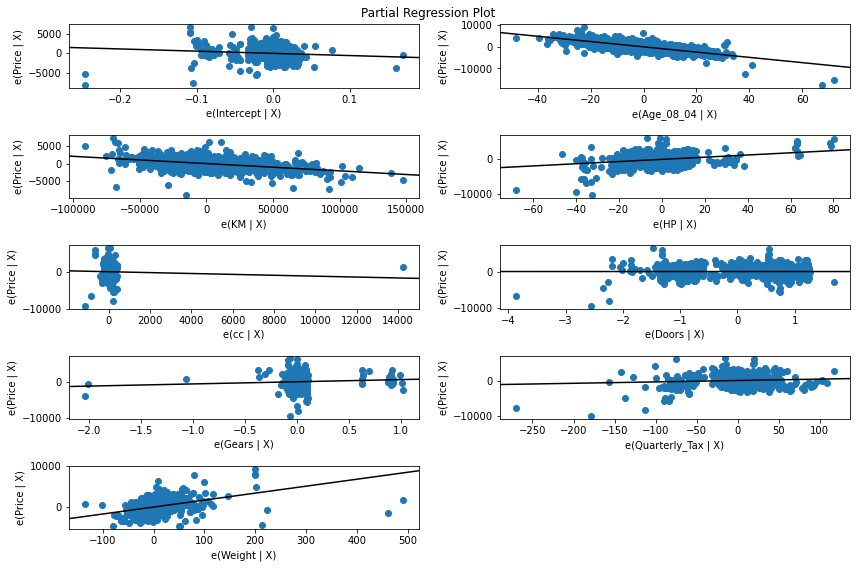

In [24]:
import statsmodels.api as sm
fig =plt.figure(figsize=(12,8))            # third opininon 
fig = sm.graphics.plot_partregress_grid(model,fig=fig)
plt.show()

In [25]:
data.drop(['Doors'],inplace=True,axis=1)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Gears          1436 non-null   int64
 6   Quarterly_Tax  1436 non-null   int64
 7   Weight         1436 non-null   int64
dtypes: int64(8)
memory usage: 89.9 KB


In [27]:
# doors is not significant. so we have to remove that
import statsmodels.formula.api as smf
model2=smf.ols("Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight", data=data).fit()

In [28]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1293.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:57:11   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1428   BIC:                         2.481e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5575.1401   1409.999     -3.954      0.000   -8341.032   -2809.248
Age_08_04      -121.6581      2.615    -46.528      0.000    -126.787    -116.529
KM               -0.0208      0.001    -16.636      0.000      -0.023      -0.018
HP               31.6728      2.810     11.270      0.000      26.160      37.186
cc               -0.1210      0.090     -1.344      0.179      -0.298       0.056
Gears           595.8324    193.400      3.081      0.002     216.453     975.212
Quarterly_Tax     3.9531      1.306      3.027      0.003       1.391       6.515
Weight           16.9478      1.033     16.401      0.000      14.921      18.975
==============================================================================
Omnibus:                      151.495   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1009.287
Skew:                          -0.218   Prob(JB):                    6.86e-220
Kurtosis:                       7.084   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
model_influence = model2.get_influence()
(c,_) = model_influence.cooks_distance
c

array([6.96739575e-03, 3.75784888e-03, 5.28338875e-03, ...,
       9.42322432e-07, 7.44544703e-04, 1.20232081e-02])

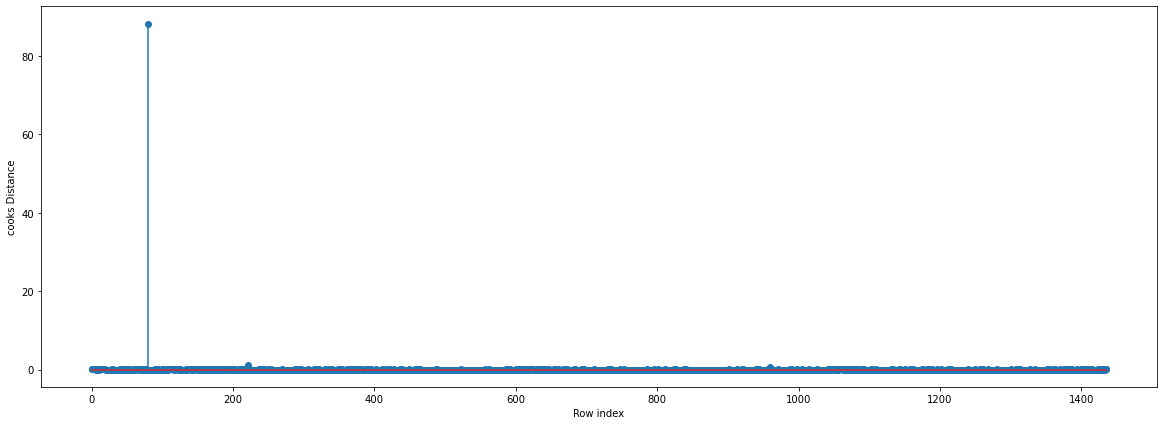

In [30]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3)) 
plt.xlabel('Row index')
plt.ylabel('cooks Distance')
plt.show()

In [31]:
data.iloc[c>0.5] 

,Price,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,100,1180
221,12450,44,74172,110,1600,5,163,1615
960,9390,66,50806,86,1300,5,19,1480


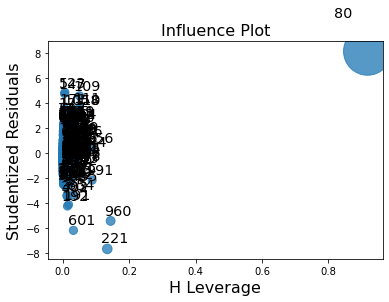

In [32]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model2)
plt.show()

In [33]:
#data1 = data.drop([80,221,960], axis=0)
#data1

In [34]:
data.drop([80,221,960], inplace=True, axis=0)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1433 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1433 non-null   int64
 1   Age_08_04      1433 non-null   int64
 2   KM             1433 non-null   int64
 3   HP             1433 non-null   int64
 4   cc             1433 non-null   int64
 5   Gears          1433 non-null   int64
 6   Quarterly_Tax  1433 non-null   int64
 7   Weight         1433 non-null   int64
dtypes: int64(8)
memory usage: 100.8 KB


In [36]:
data.shape

(1433, 8)

In [37]:
data.shape

(1433, 8)

In [38]:
data.head()

,Price,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,5,210,1165
1,13750,23,72937,90,2000,5,210,1165
2,13950,24,41711,90,2000,5,210,1165
3,14950,26,48000,90,2000,5,210,1165
4,13750,30,38500,90,2000,5,210,1170


In [39]:
import statsmodels.formula.api as smf

In [40]:
import statsmodels.formula.api as smf
model3=smf.ols("Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight", data=data).fit()

In [41]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1556.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:57:15   Log-Likelihood:                -12231.
No. Observations:                1433   AIC:                         2.448e+04
Df Residuals:                    1425   BIC:                         2.452e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.45e+04   1435.850    -10.098      0.000   -1.73e+04   -1.17e+04
Age_08_04      -112.4015      2.485    -45.237      0.000    -117.276    -107.527
KM               -0.0172      0.001    -14.328      0.000      -0.020      -0.015
HP               35.9449      2.747     13.084      0.000      30.556      41.334
cc               -3.6665      0.301    -12.198      0.000      -4.256      -3.077
Gears           579.2745    178.171      3.251      0.001     229.769     928.780
Quarterly_Tax     5.5368      1.372      4.034      0.000       2.845       8.229
Weight           29.2975      1.227     23.872      0.000      26.890      31.705
==============================================================================
Omnibus:                      109.903   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.356
Skew:                          -0.060   Prob(JB):                    1.41e-124
Kurtosis:                       6.088   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
model_influence = model3.get_influence()
(c,_) = model_influence.cooks_distance
c

array([6.22245129e-03, 3.07866703e-03, 4.35764075e-03, ...,
       2.38468259e-06, 1.04498334e-03, 2.07193212e-02])

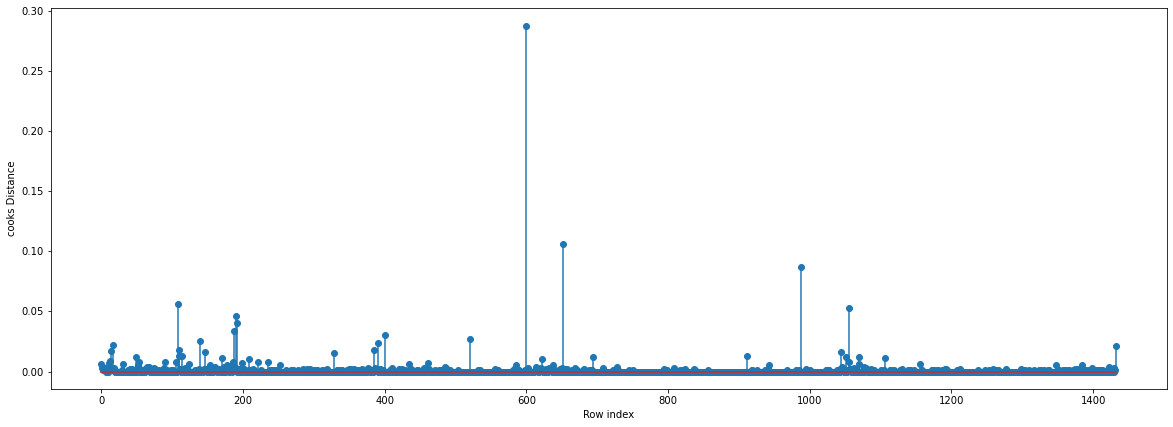

In [43]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3)) 
plt.xlabel('Row index')
plt.ylabel('cooks Distance')
plt.show()

In [44]:
#data.iloc[c>0.5] 

In [45]:
from statsmodels.graphics.regressionplots import influence_plot

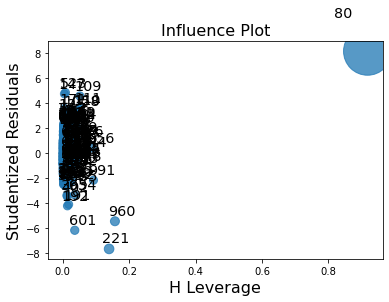

In [46]:
influence_plot(model)
plt.show()

In [47]:
k =8
n=1433

treshold=3*((k+1)/n)

treshold

0.01884159106769016

In [48]:
np.argmax(c) , np.max(c)

(599, 0.28772293638956453)

In [49]:
data1 = data.drop([598,601],axis=0)
data1

,Price,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,5,210,1165
1,13750,23,72937,90,2000,5,210,1165
2,13950,24,41711,90,2000,5,210,1165
3,14950,26,48000,90,2000,5,210,1165
4,13750,30,38500,90,2000,5,210,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,5,69,1025
1432,10845,72,19000,86,1300,5,69,1015
1433,8500,71,17016,86,1300,5,69,1015
1434,7250,70,16916,86,1300,5,69,1015


In [50]:
data1.shape

(1431, 8)

In [51]:
import statsmodels.formula.api as smf
model4=smf.ols("Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight", data=data1).fit()

In [52]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1617.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:57:19   Log-Likelihood:                -12190.
No. Observations:                1431   AIC:                         2.440e+04
Df Residuals:                    1423   BIC:                         2.444e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.58e+04   1424.602    -11.093      0.000   -1.86e+04    -1.3e+04
Age_08_04      -110.8609      2.453    -45.203      0.000    -115.672    -106.050
KM               -0.0180      0.001    -15.144      0.000      -0.020      -0.016
HP               33.5956      2.721     12.349      0.000      28.259      38.932
cc               -3.5395      0.296    -11.956      0.000      -4.120      -2.959
Gears           601.7330    175.189      3.435      0.001     258.076     945.389
Quarterly_Tax     4.1344      1.364      3.031      0.002       1.459       6.810
Weight           30.5335      1.220     25.025      0.000      28.140      32.927
==============================================================================
Omnibus:                       68.931   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.360
Skew:                           0.116   Prob(JB):                     3.83e-48
Kurtosis:                       4.900   Cond. No.                     3.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
model_influence = model4.get_influence()
(c,_) = model_influence.cooks_distance
c

array([6.42539478e-03, 3.11646929e-03, 4.51975741e-03, ...,
       4.73537225e-06, 1.12189149e-03, 2.49677710e-02])

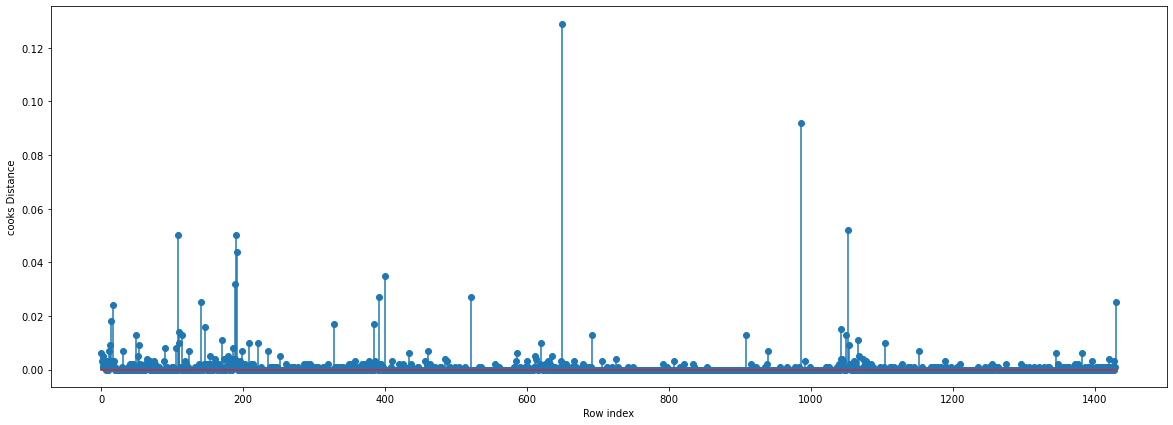

In [54]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3)) 
plt.xlabel('Row index')
plt.ylabel('cooks Distance')
plt.show()

In [55]:
k =8
n=1431

treshold=3*((k+1)/n)

treshold

0.01886792452830189

In [56]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(650, 0.12933539852644274)

In [57]:
data2 = data1.drop([650],axis=0)
data2

,Price,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,5,210,1165
1,13750,23,72937,90,2000,5,210,1165
2,13950,24,41711,90,2000,5,210,1165
3,14950,26,48000,90,2000,5,210,1165
4,13750,30,38500,90,2000,5,210,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,5,69,1025
1432,10845,72,19000,86,1300,5,69,1015
1433,8500,71,17016,86,1300,5,69,1015
1434,7250,70,16916,86,1300,5,69,1015


In [58]:
data2.shape

(1430, 8)

In [59]:
import statsmodels.formula.api as smf
model5=smf.ols("Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight", data=data2).fit()

In [60]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1616.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:57:20   Log-Likelihood:                -12182.
No. Observations:                1430   AIC:                         2.438e+04
Df Residuals:                    1422   BIC:                         2.442e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.576e+04   1426.319    -11.048      0.000   -1.86e+04    -1.3e+04
Age_08_04      -110.8777      2.453    -45.199      0.000    -115.690    -106.066
KM               -0.0179      0.001    -15.108      0.000      -0.020      -0.016
HP               33.7616      2.732     12.359      0.000      28.403      39.120
cc               -3.5521      0.297    -11.974      0.000      -4.134      -2.970
Gears           599.3272    175.257      3.420      0.001     255.538     943.116
Quarterly_Tax     4.2510      1.375      3.092      0.002       1.554       6.948
Weight           30.4964      1.222     24.966      0.000      28.100      32.893
==============================================================================
Omnibus:                       68.803   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.411
Skew:                           0.117   Prob(JB):                     6.16e-48
Kurtosis:                       4.896   Cond. No.                     3.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
model_influence = model5.get_influence()
(c,_) = model_influence.cooks_distance
c

array([6.45753732e-03, 3.14190674e-03, 4.54340363e-03, ...,
       4.70306374e-06, 1.12105116e-03, 2.50416264e-02])

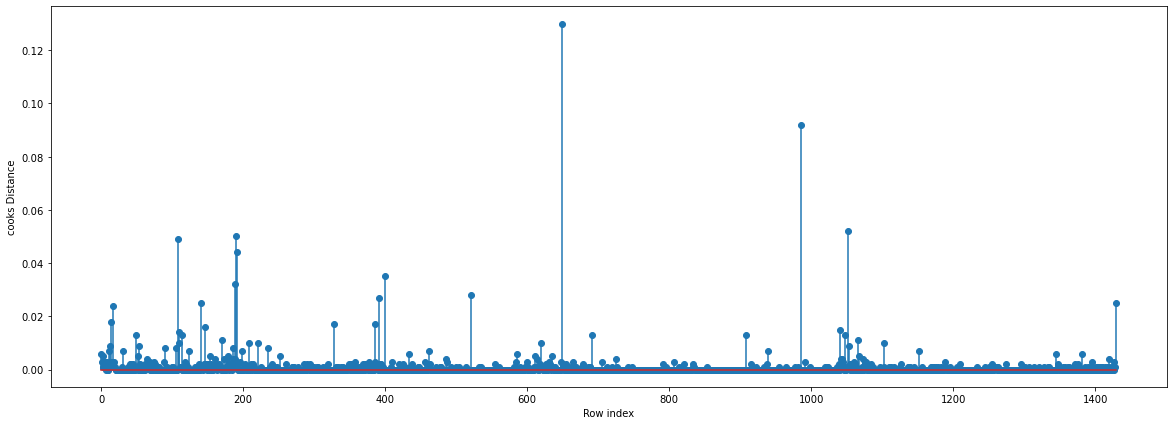

In [62]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data2)), np.round(c, 3)) 
plt.xlabel('Row index')
plt.ylabel('cooks Distance')
plt.show()

In [63]:
np.argmax(c) , np.max(c)

(649, 0.1296755534834347)

In [64]:
data2.drop([649],inplace=True, axis=0)

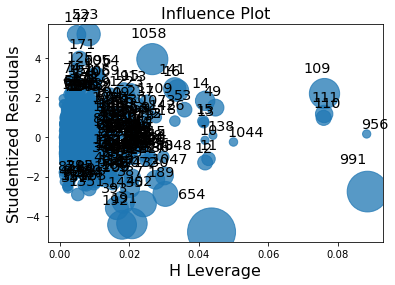

In [65]:
influence_plot(model5)
plt.show()

In [66]:
data2.drop([991,956],inplace=True, axis=0)

In [67]:
import statsmodels.formula.api as smf
model6=smf.ols("Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight", data=data2).fit()

In [68]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1621.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:57:23   Log-Likelihood:                -12154.
No. Observations:                1427   AIC:                         2.432e+04
Df Residuals:                    1419   BIC:                         2.437e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.515e+04   1460.949    -10.372      0.000    -1.8e+04   -1.23e+04
Age_08_04      -110.6744      2.451    -45.151      0.000    -115.483    -105.866
KM               -0.0179      0.001    -15.115      0.000      -0.020      -0.016
HP               34.2537      2.743     12.487      0.000      28.873      39.635
cc               -3.5620      0.296    -12.023      0.000      -4.143      -2.981
Gears           445.1046    192.345      2.314      0.021      67.793     822.416
Quarterly_Tax     4.2335      1.373      3.084      0.002       1.541       6.926
Weight           30.6150      1.221     25.083      0.000      28.221      33.009
==============================================================================
Omnibus:                       69.023   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.658
Skew:                           0.122   Prob(JB):                     5.45e-48
Kurtosis:                       4.898   Cond. No.                     3.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""